In [8]:
import pandas as pd
import numpy as np
anscombe_data = np.load('./dataset/ch3_anscombe.npy')
print(anscombe_data.shape) # 11행2열이 4개
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [9]:
import pandas as pd

# correlation : 상관계수, regression line : 회귀직선
stats_df = pd.DataFrame(index=['X_mean','X_variance','Y_mean','Y_variance',
                              'X&Y_correlation','X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:,0] 
    dataY = data[:,1] # 두번째 열을 y에
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] =\
        [f'{np.mean(dataX):.2f}',
        f'{np.var(dataX):.2f}',
        f'{np.mean(dataY):.2f}',
        f'{np.var(dataY):.2f}',
        f'{np.corrcoef(dataX,dataY)[0,1]:.2f}',
        f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


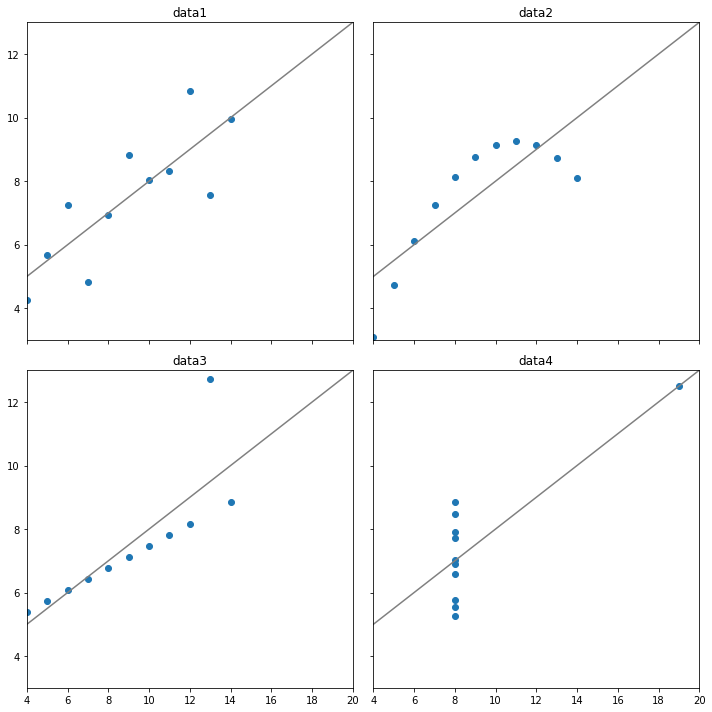

In [10]:
# 2x2개의 그래프 영역 생성
import matplotlib.pyplot as plt
# sharex/sharey : 4개그래프에 x,y축 공유
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10),
                       sharex=True, sharey=True) 
xs = np.linspace(0,30,100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1],1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4,20])
    ax.set_ylim([3,13])
    # 타이틀 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')
    
# 그래프 사이 간격좁히기
plt.tight_layout()
plt.show()

#### polyfit 함수 사용법

poly(x,y차수) 형태로 매우 간단하게 이용이 가능

In [11]:
x = [1,2,3,4,5,6]
y = [1,3,6,8,11,19]

print(np.polyfit(x,y,1)) # y = 3.314x - 3.6

[ 3.31428571 -3.6       ]


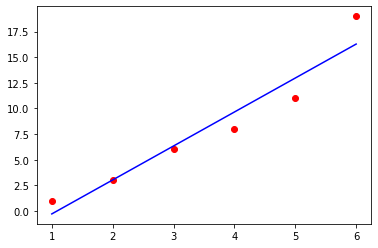

In [12]:
poly = np.polyfit(x,y,1) # x값, y값, 1차원
y_pred = np.array(x)*poly[0] + poly[1]

plt.plot(x, y_pred, color = 'b')
plt.scatter(x,y,color='r')
plt.show()

#### 2차 회귀식 및 시각화

In [13]:
print(np.polyfit(x,y,2))

[ 0.53571429 -0.43571429  1.4       ]


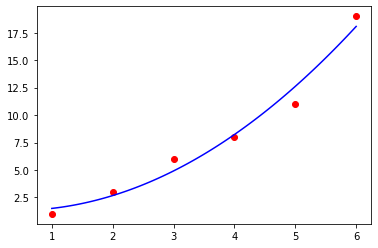

In [14]:
poly = np.polyfit(x,y,2)
x_line = np.linspace(1,6,100) # 곡선을 완만하게 그리기 위한 linspace 객체 선언
y_pred = x_line**2*poly[0] + x_line*poly[1] + poly[2]

plt.plot(x_line, y_pred, color='b')
plt.scatter(x,y,color='r')
plt.show()

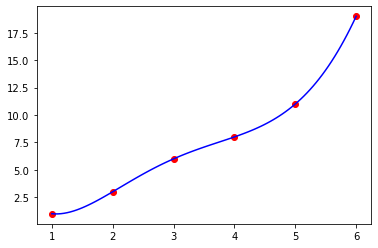

In [15]:
# 5차
poly = np.polyfit(x,y,5)
x_line = np.linspace(1,6,100)
y_pred = np.zeros_like(x_line) # 예측값을 담을 그릇(모든 값이 0인 배열)
for i in range(6):
    y_pred += x_line**(5-i)*poly[i]
plt.plot(x_line,y_pred,color='b')
plt.scatter(x,y,color='r')
plt.show()